In [1]:
# Predicting stock prices

In [16]:
# Importing Packages
import yfinance as yf
import numpy as np
from random import random
import matplotlib.pyplot as plt
from scipy.stats import norm

[*********************100%%**********************]  1 of 1 completed


                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2010-01-04  5200.899902  5238.450195  5167.100098  5232.200195  5232.200195   
2010-01-05  5277.149902  5288.350098  5242.399902  5277.899902  5277.899902   
2010-01-06  5278.149902  5310.850098  5260.049805  5281.799805  5281.799805   
2010-01-07  5281.799805  5302.549805  5244.750000  5263.100098  5263.100098   
2010-01-08  5264.250000  5276.750000  5234.700195  5244.750000  5244.750000   

            Volume  
Date                
2010-01-04       0  
2010-01-05       0  
2010-01-06       0  
2010-01-07       0  
2010-01-08       0  
                   Close
Date                    
2010-01-04   5232.200195
2010-01-05   5277.899902
2010-01-06   5281.799805
2010-01-07   5263.100098
2010-01-08   5244.750000
...                  ...
2023-09-25  19674.550781
2023-09-26  19664.699219
2023-09-27  19716.449219
2023-09-28  19523.550781

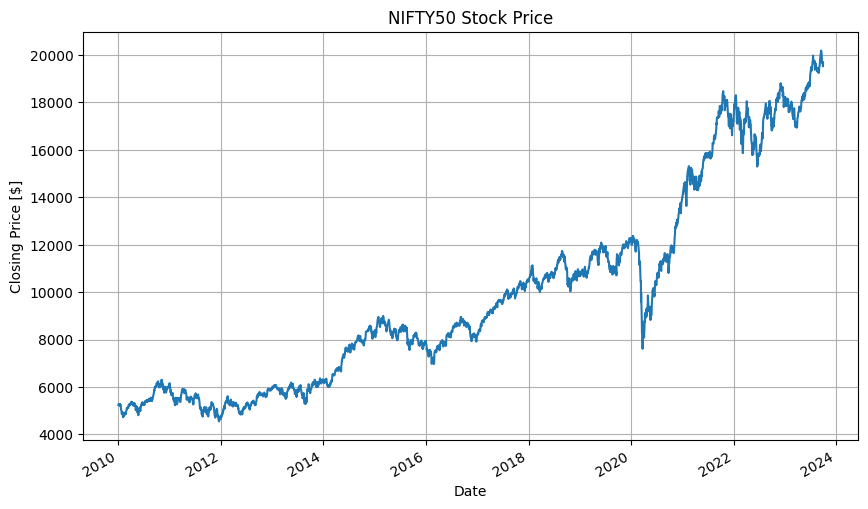

In [22]:
# Defining the Ticker

# Obtaining Historical Market Data
# Get the data for the stock AAPL
hist = yf.download('^NSEI','2010-01-04','2023-09-30')
print(hist.head())

# Pulling Closing Price Data
hist = hist[['Close']]
print(hist)

# Plotting Price Data
hist['Close'].plot(title="NIFTY50 Stock Price", ylabel=
                   "Closing Price [$]", figsize=[10, 6])
plt.grid()


# Import the yfinance. If you get module not found error the run !pip install yfinance from your Jupyter notebook
import yfinance as yf



### Stock Statistics
Let’s analyze the closing prices of SPY for use later on. First, we will need to create a couple lists: days for plotting purposes and price_orig to use the closing price data from the hist data frame. We create one more list, change, which is the percent change day to day of SPY for the last 10 years. Using change and numpy, we can calculate the mean and standard deviation of the price changes during the time period of interest. We will use these in our Monte Carlo loops next.



In [23]:
# Create Day Count, Price, and Change Lists
days = [i for i in range(1, len(hist['Close'])+1)]
price_orig = hist['Close'].tolist()
change = hist['Close'].pct_change().tolist()
change = change[1:]  # Removing the first term since it is NaN

# Statistics for Use in Model
mean = np.mean(change)
std_dev = np.std(change)
print('\nMean percent change: ' + str(round(mean*100, 2)) + '%')
print('Standard Deviation of percent change: ' +   
      str(round(std_dev*100, 2)) + '%')


Mean percent change: 0.05%
Standard Deviation of percent change: 1.07%


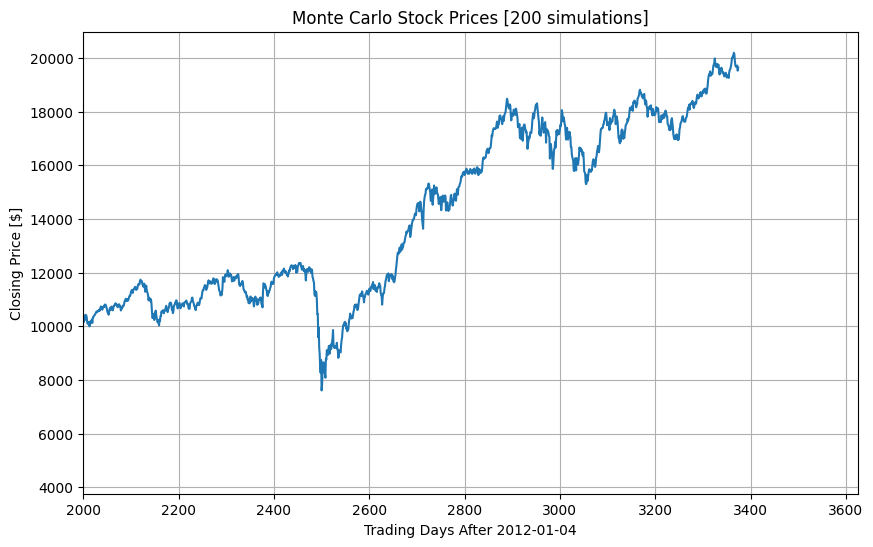

In [24]:
# Simulation Number and Prediction Period
simulations = 200 # Change for more results
days_to_sim = 1*252 # Trading days in 1 year

# Initializing Figure for Simulation
fig = plt.figure(figsize=[10, 6])
plt.plot(days, price_orig)
plt.title("Monte Carlo Stock Prices [" + str(simulations) + 
          " simulations]")
plt.xlabel("Trading Days After " + start_date)
plt.ylabel("Closing Price [$]")
plt.xlim([2000, len(days)+days_to_sim])
plt.grid()

# Initializing Lists for Analysis
close_end = []
above_close = []

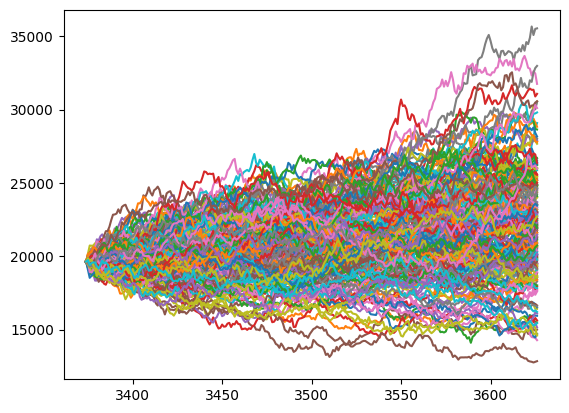

In [25]:
# For Loop for Number of Simulations Desired
for i in range(simulations):
    num_days = [days[-1]]
    close_price = [hist.iloc[-1, 0]]
    
    # For Loop for Number of Days to Predict
    for j in range(days_to_sim):
        num_days.append(num_days[-1]+1)
        perc_change = norm.ppf(random(), loc=mean, scale=std_dev)
        close_price.append(close_price[-1]*(1+perc_change))

    if close_price[-1] > price_orig[-1]:
        above_close.append(1)
    else:
        above_close.append(0)

    close_end.append(close_price[-1])
    plt.plot(num_days, close_price)

In [26]:
# Average Closing Price and Probability of Increasing After 1 Year
average_closing_price = sum(close_end)/simulations
average_perc_change = (average_closing_price-
                       price_orig[-1])/price_orig[-1]
probability_of_increase = sum(above_close)/simulations
print('\nPredicted closing price after ' + str(simulations) + 
      ' simulations: $' + str(round(average_closing_price, 2)))
print('Predicted percent increase after 1 year: ' + 
      str(round(average_perc_change*100, 2)) + '%')
print('Probability of stock price increasing after 1 year: ' + 
      str(round(probability_of_increase*100, 2)) + '%')

# Displaying the Monte Carlo Simulation Lines
plt.show()


Predicted closing price after 200 simulations: $22198.05
Predicted percent increase after 1 year: 13.03%
Probability of stock price increasing after 1 year: 75.0%
